## 🧩 1. Definição do Problema

O objetivo deste estudo de caso é construir um modelo de **agrupamento (clustering)** para **agrupar indivíduos ou investidores com base em parâmetros relacionados à capacidade e disposição para assumir riscos**.

Uso de **características demográficas e financeiras comuns** para atingir esse objetivo.

O conjunto de dados da pesquisa utilizado contém respostas de **mais de 10.000 indivíduos** nos anos de **2007 (pré-crise)** e **2009 (pós-crise)**. Existem mais de **500 variáveis** disponíveis.




In [2]:
import pandas as pd

In [6]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

In [7]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_excel('ProcessedData.xlsx')

In [5]:
dataset.shape

(3866, 13)

In [8]:
set_option('display.width', 100)
dataset.head(5)

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


<Axes: title={'center': 'Correlation Matrix'}>

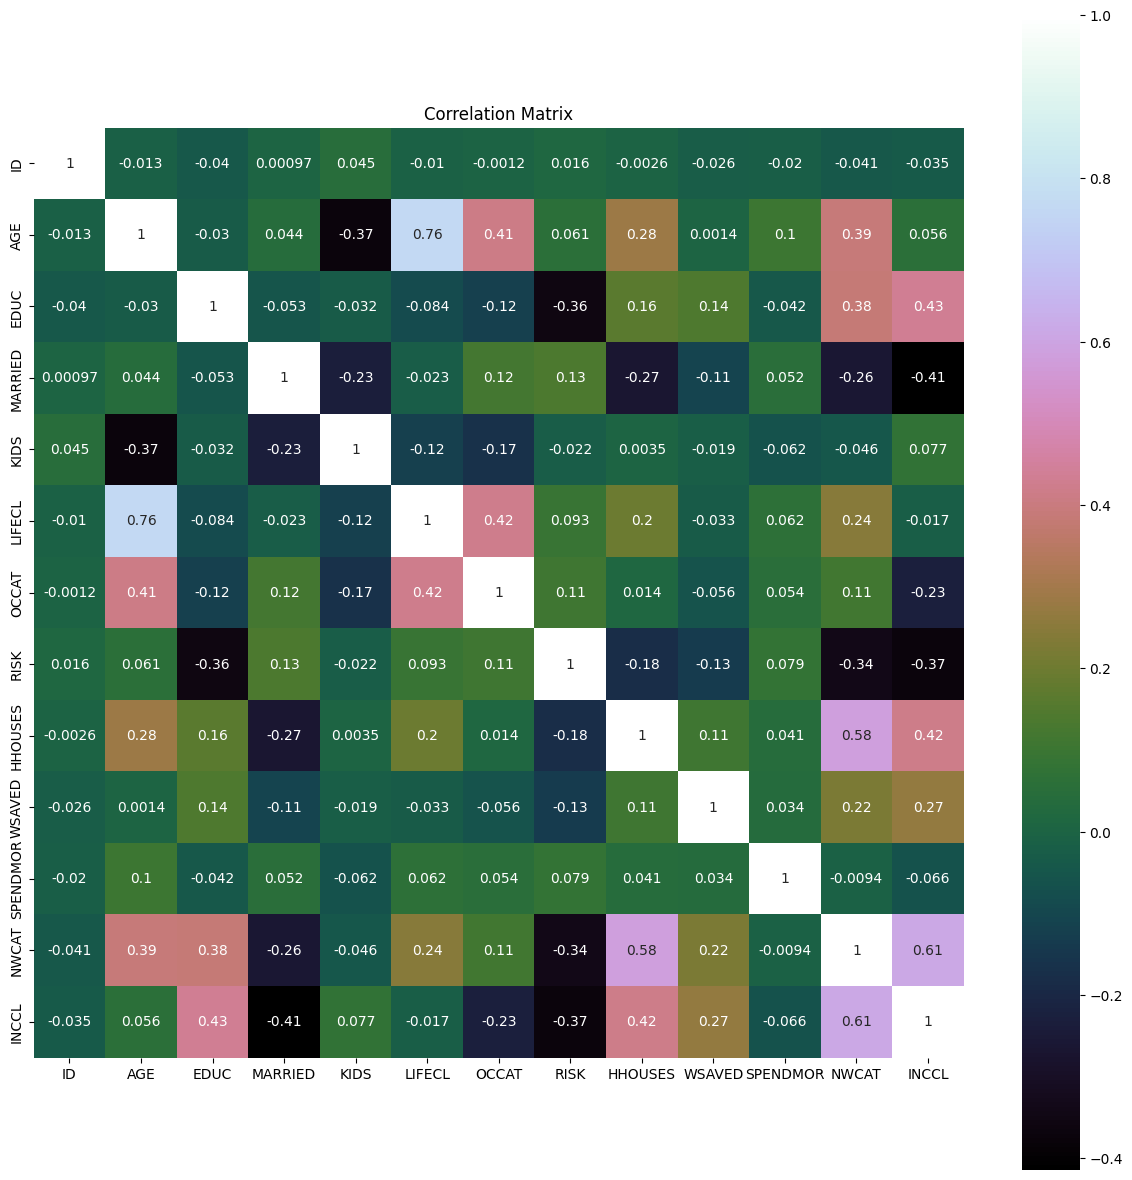

In [10]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [11]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [12]:
X=dataset.copy("deep")
X=X.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


# Encontrando o número ideal de clusters

Normalmente, dois métricas são usadas para avaliar o número de clusters em um modelo K-means:

Soma dos erros quadráticos (SSE) dentro dos clusters

Índice de silhueta (Silhouette score)

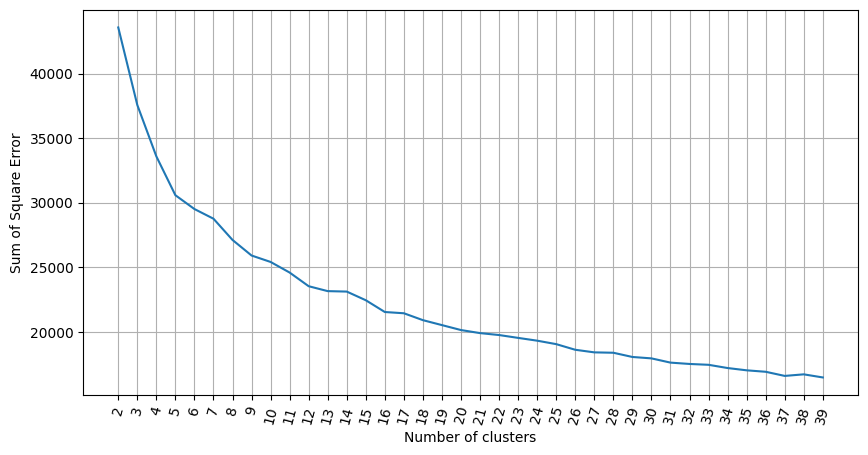

In [13]:
distorsions = []
max_loop=40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Error")
plt.grid(True)

# Silhoutte score

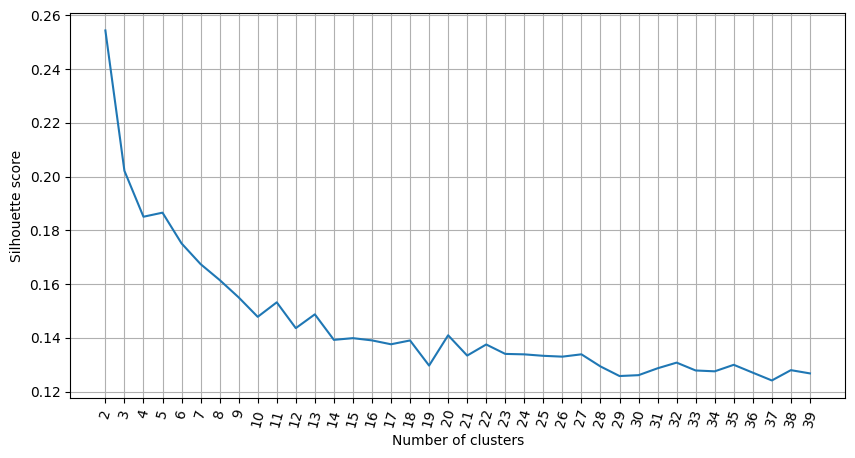

In [15]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid(True)


Analisando ambos os gráficos acima, o número ideal de clusters parece ser em torno de 7. Podemos observar que, à medida que o número de clusters ultrapassa 6, a soma dos erros quadráticos dentro dos clusters (SSE) começa a se estabilizar.

No segundo gráfico, é possível ver vários pontos onde há uma “quebra” (curvatura) visível na linha. Como não há uma diferença significativa no SSE após 7 clusters, utilizaremos 7 clusters no modelo k-means a seguir.

# Clustering and Visualisation

In [16]:
nclust=7

In [17]:
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=7)

In [18]:

#Extracting labels 
target_labels = k_means.predict(X)

In [21]:
target_labels


array([6, 4, 2, ..., 0, 2, 2], dtype=int32)

# Intuição do Cluster

In [22]:
cluster_output= pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'])],axis = 1)
output=cluster_output.groupby('cluster').mean()
output

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
cluster,,,,,,,,,,,,
0,4.879865,2.079526,1.592217,0.189509,5.656514,2.434856,3.582064,0.685279,2.240271,3.937394,2.267343,2.588832
1,1.908922,2.470260,1.314126,2.128253,3.336431,1.427509,3.356877,0.533457,2.258364,4.520446,1.765799,3.171004
2,2.459144,3.538262,1.134890,1.566796,2.740597,1.446174,2.478599,0.944228,2.710765,3.517510,4.259403,4.717250
3,4.601093,3.486339,1.243169,0.366120,5.325137,2.049180,2.713115,0.931694,2.568306,2.081967,4.418033,4.508197
4,4.654511,3.355086,1.245681,0.312860,5.345489,2.047985,2.854127,0.946257,2.631478,4.535509,4.376200,4.345489
5,1.910798,2.424883,1.291080,2.023474,3.291080,1.417840,3.276995,0.507042,2.215962,1.988263,1.793427,3.230047
6,1.964778,2.898928,1.615620,0.001531,1.385911,1.516080,3.145482,0.459418,2.407351,3.558959,1.946401,3.110260


# Variaveis demograficas

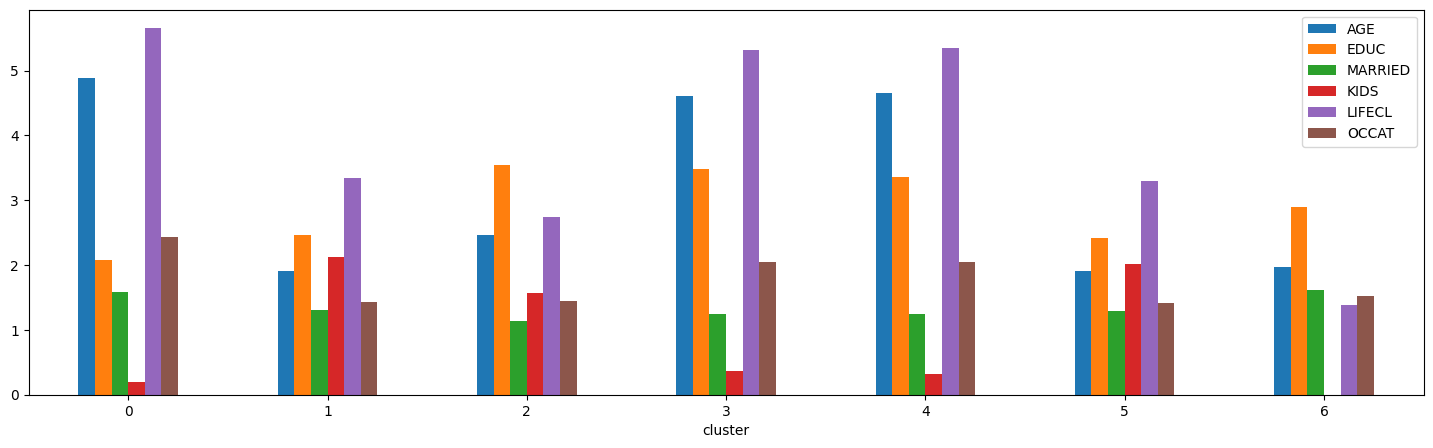

In [23]:
output[['AGE','EDUC','MARRIED','KIDS','LIFECL','OCCAT']].plot.bar(rot=0, figsize=(18,5));